<a href="https://colab.research.google.com/github/ndsoi/ndsoi/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

从csv文件中读取数据

In [1]:
import os
current_directory = os.getcwd()
print("当前目录:", current_directory)


当前目录: /content


In [2]:
import csv
# 编码方式是gbk，用utf-8会报解码错
good_melon = []
bad_melon = []
with open("/data3a.csv",encoding="gbk") as f:
  reader = csv.DictReader(f)
  for row in reader:
    x1,x2 = float(row['密度']),float(row['含糖率'])
    # 标签的1是字符串1，不是数字1
    if row['标签'] == '1':
      good_melon.append([x1,x2])
    else:
      bad_melon.append([x1,x2])

print(good_melon)
print(bad_melon)



[[0.697, 0.46], [0.774, 0.376], [0.634, 0.264], [0.608, 0.318], [0.556, 0.215], [0.403, 0.237], [0.481, 0.149], [0.437, 0.211]]
[[0.666, 0.091], [0.243, 0.0267], [0.245, 0.057], [0.343, 0.099], [0.639, 0.161], [0.657, 0.198], [0.36, 0.37], [0.593, 0.042], [0.719, 0.103]]


将列表转化为便于矩阵运算的numpy

In [3]:
import numpy as np
good_melon = np.array(good_melon)
bad_melon = np.array(bad_melon)
print(good_melon)
print(bad_melon)

# # 转置
# good_melon = np.transpose(good_melon)
# bad_melon = np.transpose(bad_melon)

# print(good_melon)
# print(bad_melon)

[[0.697 0.46 ]
 [0.774 0.376]
 [0.634 0.264]
 [0.608 0.318]
 [0.556 0.215]
 [0.403 0.237]
 [0.481 0.149]
 [0.437 0.211]]
[[0.666  0.091 ]
 [0.243  0.0267]
 [0.245  0.057 ]
 [0.343  0.099 ]
 [0.639  0.161 ]
 [0.657  0.198 ]
 [0.36   0.37  ]
 [0.593  0.042 ]
 [0.719  0.103 ]]


计算均值μ<br>
构造出$$S_{\omega} = \Sigma_0+\Sigma_1=\sum_{x\epsilon X_0}(x-\mu_0)(x-\mu_0)^T+\sum_{x\epsilon X_1}(x-\mu_1)(x-\mu_1)^T$$

In [4]:
def cal_mu(melon):
  x = 0.0
  y = 0.0
  for i in melon:
    x += i[0]
    y += i[1]
  return [x/len(melon),y/len(melon)]


mu_0 = np.array(cal_mu(bad_melon))
mu_1 = np.array(cal_mu(good_melon))

print(f"mu_0={mu_0}")
print(f"mu_1={mu_1}")


def cal_Sigma(melon,mu,shape):
  res = np.zeros(shape)

  print(f"res={res}")
  for i in melon:
    tmp = np.dot((i-mu),np.transpose(i-mu))

    res += np.dot((i-mu),np.transpose(i-mu))
  return res

Sigma_0 = cal_Sigma(bad_melon,mu_0,(2,2))
Sigma_1 = cal_Sigma(good_melon,mu_1,(2,2))

print(Sigma_0)
print(Sigma_1)

S_w = Sigma_0+Sigma_1
print(S_w)

S_w = np.transpose(S_w)

mu_0=[0.49611111 0.12752222]
mu_1=[0.57375 0.27875]
res=[[0. 0.]
 [0. 0.]]
res=[[0. 0.]
 [0. 0.]]
[[0.39340752 0.39340752]
 [0.39340752 0.39340752]]
[[0.188167 0.188167]
 [0.188167 0.188167]]
[[0.58157452 0.58157452]
 [0.58157452 0.58157452]]


对Sw进行奇异值分解：
$$S_{\omega} = U\Sigma V^T$$
以此解出$$S_{\omega}^{-1} = V \Sigma^{-1}U^T$$

In [5]:
U,Sigma,VT = np.linalg.svd(S_w)
print(U) # (2,2)
print(Sigma) # (2)
print(VT)   #(4,4)

# 先计算后两个矩阵相乘
tmp = (np.dot(1-Sigma,np.transpose(U)))


S_w_1 = np.dot(VT.T,tmp)
print(S_w_1)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[1.16314905e+00 7.85046229e-17]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[-0.16314905  1.        ]


达到w
$$\omega = S_{\omega}^{-1}(\mu_0-\mu_1)$$

In [6]:

w = np.dot(S_w_1,(mu_0-mu_1))

print(w)

-0.1385610668987654


将点和直线可视化
y = wx


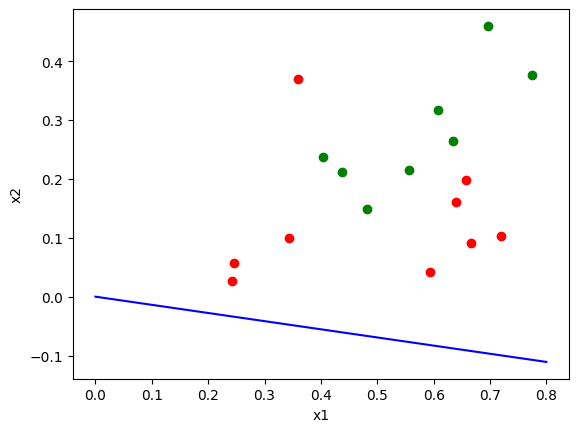

In [7]:
import matplotlib.pyplot as plt
# 先可视化点
g_x1 = [ i[0] for i in good_melon]
g_x2 = [ i[1] for i in good_melon]

plt.scatter(g_x1,g_x2,c='g')


b_x1 = [ i[0] for i in bad_melon]
b_x2 = [ i[1] for i in bad_melon]


plt.scatter(b_x1,b_x2,c='r')

plt.xlabel("x1")
plt.ylabel("x2")

# 绘制直线
#
x = np.linspace(0,0.8,200)
y = w*x
plt.plot(x,y,"b",label="line")


plt.show()
